In [1]:
from astropy.io import fits
from astropy.table import Table
import numpy as np
import matplotlib.pylab as plt 
import matplotlib.lines as mlines
from matplotlib.legend import Legend
from pythonds.basic.stack import Stack
from math import *
from sklearn.neighbors import KDTree
from lrg_plot_functions import *
from lrg_sum_functions import *
from cosmo_Calc import *
from divideByTwo import *
from read_data import *
from nearNeighbors import *
from scipy import stats
from astropy import stats
import healpy as hp
from localBKG_and_interlopersHEALPix import *
# import healpy as hpy
from makeCutoutTableFunc import *
from plotHistogramProjections3D import *

In [2]:
# read in near

data_near = np.load('/Users/mtownsend/Documents/LRG_Data/data_near-EDR.npz')
near_total = data_near['near_total']
near35 = data_near['data_near35']
near05 = data_near['data_near05']
near65 = data_near['data_near65']

print(near35.shape)
print(near05.shape)
print(near65.shape)

(309, 49, 49, 49)
(617, 49, 49, 49)
(897, 49, 49, 49)


In [28]:
# read in Nbkg

data_Nbkg = np.load('/Users/mtownsend/Documents/LRG_Data/data_Nbkg-EDR.npz')
Nbkg_total = data_Nbkg['Nbkg_total']
Nbkg35 = data_Nbkg['data_Nbkg35']
Nbkg05 = data_Nbkg['data_Nbkg05']
Nbkg65 = data_Nbkg['data_Nbkg65']

print(Nbkg_total.shape)
print(Nbkg35.shape)
print(Nbkg05.shape)
print(Nbkg65.shape)

(1823, 49, 49, 49)
(309, 49, 49, 49)
(617, 49, 49, 49)
(897, 49, 49, 49)


In [3]:
# read in selection matrices

# lowz
smatrix_low = np.load('/Users/mtownsend/Desktop/lowz_smatrix-1matrices-EDR.npz')
low_smatrix = smatrix_low['smatrix']
smatrix_low35 = low_smatrix[0]
# print(smatrix_low35.shape)

# print()
# print()

# midz
smatrix_mid = np.load('/Users/mtownsend/Desktop/midz_smatrix-2matrices-EDR.npz')
mid_smatrix = smatrix_mid['smatrix']
smatrix_mid35 = mid_smatrix[0]
smatrix_mid05 = mid_smatrix[1]
# print(smatrix_mid35.shape)
# print(smatrix_mid05.shape)

# print()
# print()

# highz
smatrix_high = np.load('/Users/mtownsend/Desktop/highz_smatrix-3matrices-EDR.npz')
high_smatrix = smatrix_high['smatrix']
smatrix_high35 = high_smatrix[0]
smatrix_high05 = high_smatrix[1]
smatrix_high65 = high_smatrix[2]

In [12]:
# apply masks

# lowz
near35_low = []
for i in range(len(near35)):
    near35_low.append(near35[i] * smatrix_low35)

print(np.asarray(near35_low).shape)

# midz
near35_mid = []
for i in range(len(near35)):
    near35_mid.append(near35[i] * smatrix_mid35)
    
print(np.asarray(near35_mid).shape)
    
near05_mid = []
for i in range(len(near05)):
    near05_mid.append(near05[i] * smatrix_mid05)
    
print(np.asarray(near05_mid).shape)


# highz
near35_high = []
for i in range(len(near35)):
    near35_high.append(near35[i] * smatrix_high35)
    
print(np.asarray(near35_high).shape)
    
near05_high = []
for i in range(len(near05)):
    near05_high.append(near05[i] * smatrix_high05)
    
print(np.asarray(near05_high).shape)
    
near65_high = []
for i in range(len(near65)):
    near65_high.append(near65[i] * smatrix_high65)
    
print(np.asarray(near65_high).shape)

(309, 49, 49, 49)
(309, 49, 49, 49)
(617, 49, 49, 49)
(309, 49, 49, 49)
(617, 49, 49, 49)
(897, 49, 49, 49)


In [13]:
# edges for function

rz_edges = np.array([-1.8027077, -1.5527076721191406, -1.3027076721191406, -1.0527076721191406, -0.8027076721191406, -0.5527076721191406, -0.3027076721191406, -0.052707672119140625, 0.19729232788085938, 0.4472923278808594, 0.6972923278808594, 0.9472923278808594, 1.1972923278808594, 1.4472923278808594, 1.6972923278808594, 1.9472923278808594, 2.1972923278808594, 2.4472923278808594, 2.6972923278808594, 2.9472923278808594, 3.1972923278808594, 3.4472923278808594, 3.6972923278808594, 3.9472923278808594, 4.197292327880859, 4.447292327880859, 4.697292327880859, 4.947292327880859, 5.197292327880859, 5.447292327880859, 5.697292327880859, 5.947292327880859, 6.197292327880859, 6.447292327880859, 6.697292327880859, 6.947292327880859, 7.197292327880859, 7.447292327880859, 7.697292327880859, 7.947292327880859, 8.19729232788086, 8.44729232788086, 8.69729232788086, 8.94729232788086, 9.19729232788086, 9.44729232788086, 9.69729232788086, 9.94729232788086, 10.19729232788086, 10.44729232788086])
# zmag_edges = np.array([13.22509, 14.025090026855466, 15.025090026855462, 16.02509002685546, 17.025090026855455, 18.02509002685545, 19.025090026855448, 20.025090026855445, 21.025, 22.025090026855437, 23.025090026855434])
gr_edges = np.array([-6.5846786, -6.234678649902344, -5.8846786499023445, -5.534678649902345, -5.184678649902345, -4.8346786499023455, -4.484678649902346, -4.134678649902346, -3.784678649902346, -3.434678649902346, -3.084678649902346, -2.734678649902346, -2.384678649902346, -2.0346786499023457, -1.6846786499023456, -1.3346786499023455, -0.9846786499023455, -0.6346786499023456, -0.2846786499023456, 0.06532135009765438, 0.41532135009765436, 0.7653213500976543, 1.1153213500976542, 1.4653213500976543, 1.8153213500976544, 2.1653213500976545, 2.5153213500976546, 2.8653213500976547, 3.2153213500976547, 3.565321350097655, 3.915321350097655, 4.265321350097655, 4.615321350097655, 4.965321350097654, 5.315321350097654, 5.665321350097654, 6.015321350097653, 6.365321350097653, 6.7153213500976525, 7.065321350097652, 7.415321350097652, 7.7653213500976515, 8.115321350097652, 8.465321350097652, 8.815321350097651, 9.165321350097651, 9.51532135009765, 9.86532135009765, 10.21532135009765, 10.56532135009765])

zmaginit = 13.
zmagfin = 23.
interval = 0.2
zmag_num = (zmagfin-zmaginit)/interval
zmag_edges, step = np.linspace(zmaginit, zmagfin, num=int(zmag_num), retstep=True)
print(type(zmag_edges))

# edges = np.array([rz_edges, zmag_edges, gr_edges])
edges = np.array([rz_edges, gr_edges, zmag_edges])
print(edges.shape)

<class 'numpy.ndarray'>
(3, 50)


In [14]:
# the redshift, rzcolor, and zmag of LRGs

data_zLRG = np.load('/Users/mtownsend/anaconda/Data/z_LRG.npz')
zLRG = data_zLRG['z_LRG']
print(zLRG.shape)

print('----')

data_zmagLRG = np.load('/Users/mtownsend/anaconda/Data/zmag_LRG.npz')
zmagLRG = data_zmagLRG['zmag_LRG']
print(zmagLRG.shape)
print(zmagLRG.min())
print(zmagLRG.max())

print('----')

data_grcolorLRG = np.load('/Users/mtownsend/anaconda/Data/grcolor_LRG.npz')
grcolorLRG = data_grcolorLRG['grcolor_LRG']
print(grcolorLRG.shape)

print('----')

data_rzcolorLRG = np.load('/Users/mtownsend/anaconda/Data/rzcolor_LRG.npz')
rzcolorLRG = data_rzcolorLRG['rzcolor_LRG']
print(rzcolorLRG.shape)


(1823,)
----
(1823,)
15.818878
21.957382
----
(1823,)
----
(1823,)


In [29]:
# projections

import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors

rz_zmag_sum_low35 = list(np.zeros((49,49)))
temp = []
for i in range(len(near35_low)):
    arr_sum_low35 = near35_low[i][:, :, :].sum(axis=1)
    rz_zmag_sum_low35 += arr_sum_low35

rz_vs_zmag_low35 = np.flipud(rz_zmag_sum_low35)



rz_zmag_sum_mid35 = list(np.zeros((49,49)))
temp = []
for i in range(len(near35_mid)):
    arr_sum_mid35 = near35_mid[i][:, :, :].sum(axis=1)
    rz_zmag_sum_mid35 += arr_sum_mid35

rz_vs_zmag_mid35 = np.flipud(rz_zmag_sum_mid35)


rz_zmag_sum_mid05 = list(np.zeros((49,49)))
for i in range(len(near05_mid)):
    arr_sum_mid05 = near05_mid[i][:, :, :].sum(axis=1)
    rz_zmag_sum_mid05 += arr_sum_mid05

rz_vs_zmag_mid05 = np.flipud(rz_zmag_sum_mid05)



rz_zmag_sum_high35 = list(np.zeros((49,49)))
for i in range(len(near35_high)):
    arr_sum_high35 = near35_high[i][:, :, :].sum(axis=1)
    rz_zmag_sum_high35 += arr_sum_high35

rz_vs_zmag_high35 = np.flipud(rz_zmag_sum_high35)

rz_zmag_sum_high05 = list(np.zeros((49,49)))
for i in range(len(near05_high)):
    arr_sum_high05 = near05_high[i][:, :, :].sum(axis=1)
    rz_zmag_sum_high05 += arr_sum_high05

rz_vs_zmag_high05 = np.flipud(rz_zmag_sum_high05)

rz_zmag_sum_high65 = list(np.zeros((49,49)))
for i in range(len(near65_high)):
    arr_sum_high65 = near65_high[i][:, :, :].sum(axis=1)
    rz_zmag_sum_high65 += arr_sum_high65

rz_vs_zmag_high65 = np.flipud(rz_zmag_sum_high65)



# unmasked

near_rz_zmag_sum35 = list(np.zeros((49,49)))
for i in range(len(near35)):
    near_arr_sum35 = near35[i][:, :, :].sum(axis=1)
    near_rz_zmag_sum35 += near_arr_sum35

near_rz_vs_zmag35 = np.flipud(near_rz_zmag_sum35)

near_rz_zmag_sum05 = list(np.zeros((49,49)))
for i in range(len(near05)):
    near_arr_sum05 = near05[i][:, :, :].sum(axis=1)
    near_rz_zmag_sum05 += near_arr_sum05

near_rz_vs_zmag05 = np.flipud(near_rz_zmag_sum05)

near_rz_zmag_sum65 = list(np.zeros((49,49)))
for i in range(len(near65)):
    near_arr_sum65 = near65[i][:, :, :].sum(axis=1)
    near_rz_zmag_sum65 += near_arr_sum65

near_rz_vs_zmag_high65 = np.flipud(near_rz_zmag_sum65)




nbkg_rz_zmag_sum35 = list(np.zeros((49,49)))
for i in range(len(near35)):
    nbkg_arr_sum35 = near35[i][:, :, :].sum(axis=1)
    nbkg_rz_zmag_sum35 += nbkg_arr_sum35

nbkg_rz_vs_zmag35 = np.flipud(nbkg_rz_zmag_sum35)

nbkg_rz_zmag_sum05 = list(np.zeros((49,49)))
for i in range(len(near05)):
    nbkg_arr_sum05 = near05[i][:, :, :].sum(axis=1)
    nbkg_rz_zmag_sum05 += nbkg_arr_sum05

nbkg_rz_vs_zmag05 = np.flipud(nbkg_rz_zmag_sum05)

nbkg_rz_zmag_sum65 = list(np.zeros((49,49)))
for i in range(len(near65)):
    nbkg_arr_sum65 = near65[i][:, :, :].sum(axis=1)
    nbkg_rz_zmag_sum65 += nbkg_arr_sum65

nbkg_rz_vs_zmag_high65 = np.flipud(nbkg_rz_zmag_sum65)




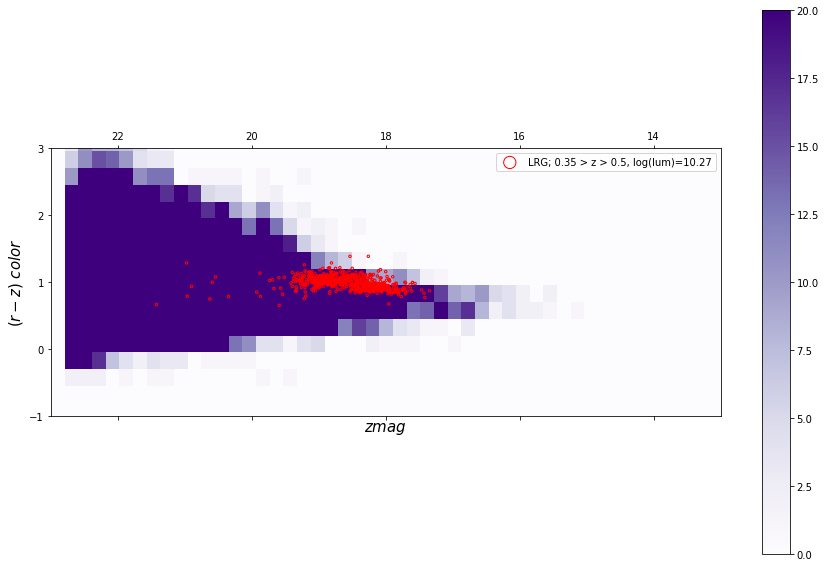

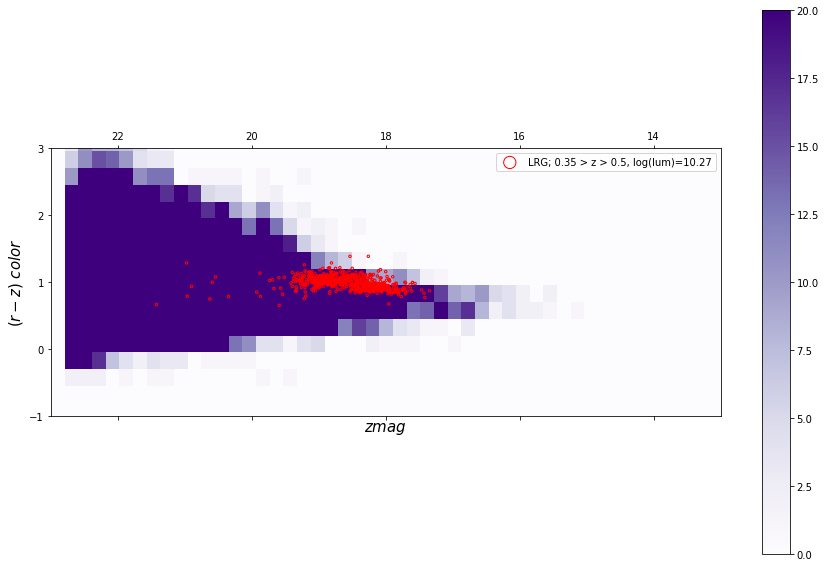

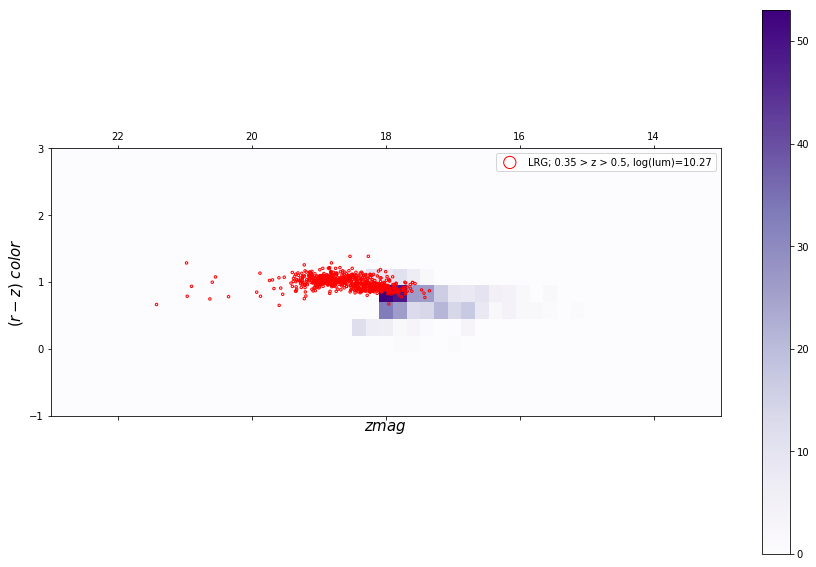

In [32]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(15,20)) #, sharex=True, sharey=True)

im5 = axes.matshow(near_rz_vs_zmag05, cmap=plt.cm.Purples, norm=colors.Normalize(), extent=[edges[2][0], edges[2][len(edges[0]) - 1], edges[0][0], edges[0][len(edges[1]) - 1]], vmax=20)
axes.scatter(zmagLRG[np.where((zLRG >= 0.35) & (zLRG < 0.5))], rzcolorLRG[np.where((zLRG >= 0.35) & (zLRG < 0.5))], s=6, alpha=1, facecolors='none', edgecolors='r', label="LRG; 0.35 > z > 0.5, log(lum)=10.27")

plt.gca().invert_xaxis()
# plt.tick_params(axis='both', which='major', labelsize=14)
# plt.xlim(22.36, 16)
plt.ylim(ymin=-1, ymax=3)
# axes[1,1].colorbar(im5, orientation="vertical", fraction=0.037, pad=0.07, label='counts', shrink=0.4)
plt.colorbar(im5, shrink=0.5)
plt.xlabel(r'$zmag$', fontsize=15)
plt.ylabel(r'$(r-z)$ $color$', fontsize=15)
plt.legend(loc='upper right', prop={'size': 10}, markerscale=5.0)

plt.show()


fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(15,20)) #, sharex=True, sharey=True)

im6 = axes.matshow(nbkg_rz_vs_zmag05, cmap=plt.cm.Purples, norm=colors.Normalize(), extent=[edges[2][0], edges[2][len(edges[0]) - 1], edges[0][0], edges[0][len(edges[1]) - 1]], vmax=20)
axes.scatter(zmagLRG[np.where((zLRG >= 0.35) & (zLRG < 0.5))], rzcolorLRG[np.where((zLRG >= 0.35) & (zLRG < 0.5))], s=6, alpha=1, facecolors='none', edgecolors='r', label="LRG; 0.35 > z > 0.5, log(lum)=10.27")

plt.gca().invert_xaxis()
# plt.tick_params(axis='both', which='major', labelsize=14)
# plt.xlim(22.36, 16)
plt.ylim(ymin=-1, ymax=3)
# axes[1,1].colorbar(im5, orientation="vertical", fraction=0.037, pad=0.07, label='counts', shrink=0.4)
plt.colorbar(im6, shrink=0.5)
plt.xlabel(r'$zmag$', fontsize=15)
plt.ylabel(r'$(r-z)$ $color$', fontsize=15)
plt.legend(loc='upper right', prop={'size': 10}, markerscale=5.0)

plt.show()


fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(15,20)) #, sharex=True, sharey=True)


im7 = axes.matshow(rz_vs_zmag_high05, cmap=plt.cm.Purples, norm=colors.Normalize(), extent=[edges[2][0], edges[2][len(edges[0]) - 1], edges[0][0], edges[0][len(edges[1]) - 1]])
axes.scatter(zmagLRG[np.where((zLRG >= 0.35) & (zLRG < 0.5))], rzcolorLRG[np.where((zLRG >= 0.35) & (zLRG < 0.5))], s=6, alpha=1, facecolors='none', edgecolors='r', label="LRG; 0.35 > z > 0.5, log(lum)=10.27")

plt.gca().invert_xaxis()
# plt.tick_params(axis='both', which='major', labelsize=14)
# plt.xlim(22.36, 16)
plt.ylim(ymin=-1, ymax=3)
# axes[1,1].colorbar(im5, orientation="vertical", fraction=0.037, pad=0.07, label='counts', shrink=0.4)
plt.colorbar(im7, shrink=0.5)
plt.xlabel(r'$zmag$', fontsize=15)
plt.ylabel(r'$(r-z)$ $color$', fontsize=15)
plt.legend(loc='upper right', prop={'size': 10}, markerscale=5.0)

plt.show()